# 第5章: 係り受け解析

In [1]:
class Morph:
    def __init__(self, morph):
        surface, attr = morph.split('\t')
        attr = attr.split(',')
        self.surface = surface
        self.base = attr[6]
        self.pos = attr[0]
        self.pos1 = attr[1]

In [2]:
filename = './ai.ja.txt.parsed'

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:
        if line[0]== '*':
            continue
        elif line != 'EOS\n':
            morphs.append(Morph(line))
        else:
            sentences.append(morphs)
            morphs = []

for m in sentences[2]:
    print(vars(m))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

In [3]:
class Chunk():
  def __init__(self, morphs, dst):
    self.morphs = morphs
    self.dst = dst
    self.srcs = []


class Sentence():
  def __init__(self, chunks):
    self.chunks = chunks
    for i, chunk in enumerate(self.chunks):
      if chunk.dst not in [None, -1]:
        self.chunks[chunk.dst].srcs.append(i)

In [4]:
filename = './ai.ja.txt.parsed'

sentences = []
chunks = []
morphs = []
with open(filename, mode='r') as f:
  for line in f:
    if line[0] == '*':  
      if len(morphs) > 0:
        chunks.append(Chunk(morphs, dst))
        morphs = []
      dst = int(line.split()[2].rstrip('D'))
    elif line != 'EOS\n':  
      morphs.append(Morph(line))
    else:  
      chunks.append(Chunk(morphs, dst))
      sentences.append(Sentence(chunks))
      morphs = []
      chunks = []
      dst = None

for chunk in sentences[2].chunks:
  print([morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs)

['人工', '知能'] 17 []
['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
['AI'] 3 []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
['「', '『', '計算'] 5 []
['（', '）', '』', 'という'] 9 [4]
['概念', 'と'] 9 []
['『', 'コンピュータ'] 8 []
['（', '）', '』', 'という'] 9 [7]
['道具', 'を'] 10 [5, 6, 8]
['用い', 'て'] 12 [9]
['『', '知能', '』', 'を'] 12 []
['研究', 'する'] 13 [10, 11]
['計算', '機', '科学'] 14 [12]
['（', '）', 'の'] 15 [13]
['一', '分野', '」', 'を'] 16 [14]
['指す'] 17 [15]
['語', '。'] 34 [0, 1, 3, 16]
['「', '言語', 'の'] 20 []
['理解', 'や'] 20 []
['推論', '、'] 21 [18, 19]
['問題', '解決', 'など', 'の'] 22 [20]
['知的', '行動', 'を'] 24 [21]
['人間', 'に'] 24 []
['代わっ', 'て'] 26 [22, 23]
['コンピューター', 'に'] 26 []
['行わ', 'せる'] 27 [24, 25]
['技術', '」', '、', 'または', '、'] 34 [26]
['「', '計算', '機'] 29 []
['（', 'コンピュータ', '）', 'による'] 31 [28]
['知的', 'な'] 31 []
['情報処理', 'システム', 'の'] 33 [29, 30]
['設計', 'や'] 33 []
['実現', 'に関する'] 34 [31, 32]
['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33]
['さ', 'れる', '。'] -1 [34]


In [5]:
sentence = sentences[2]
for chunk in sentence.chunks:
    if int(chunk.dst) not in [None, -1]:
        modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
        modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
        print(modifier, modifiee, sep='\t')

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


In [6]:
sentence = sentences[2]

for chunk in sentence.chunks:
    if int(chunk.dst) not in [None, -1]:
        modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
        modifier_pos = [morph.pos for morph in chunk.morphs]
        modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
        modifiee_pos = [morph.pos for morph in sentence.chunks[int(chunk.dst)].morphs]
        if '名詞' in modifier_pos and '動詞' in modifiee_pos:
            print(modifier, modifiee, sep='\t')

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


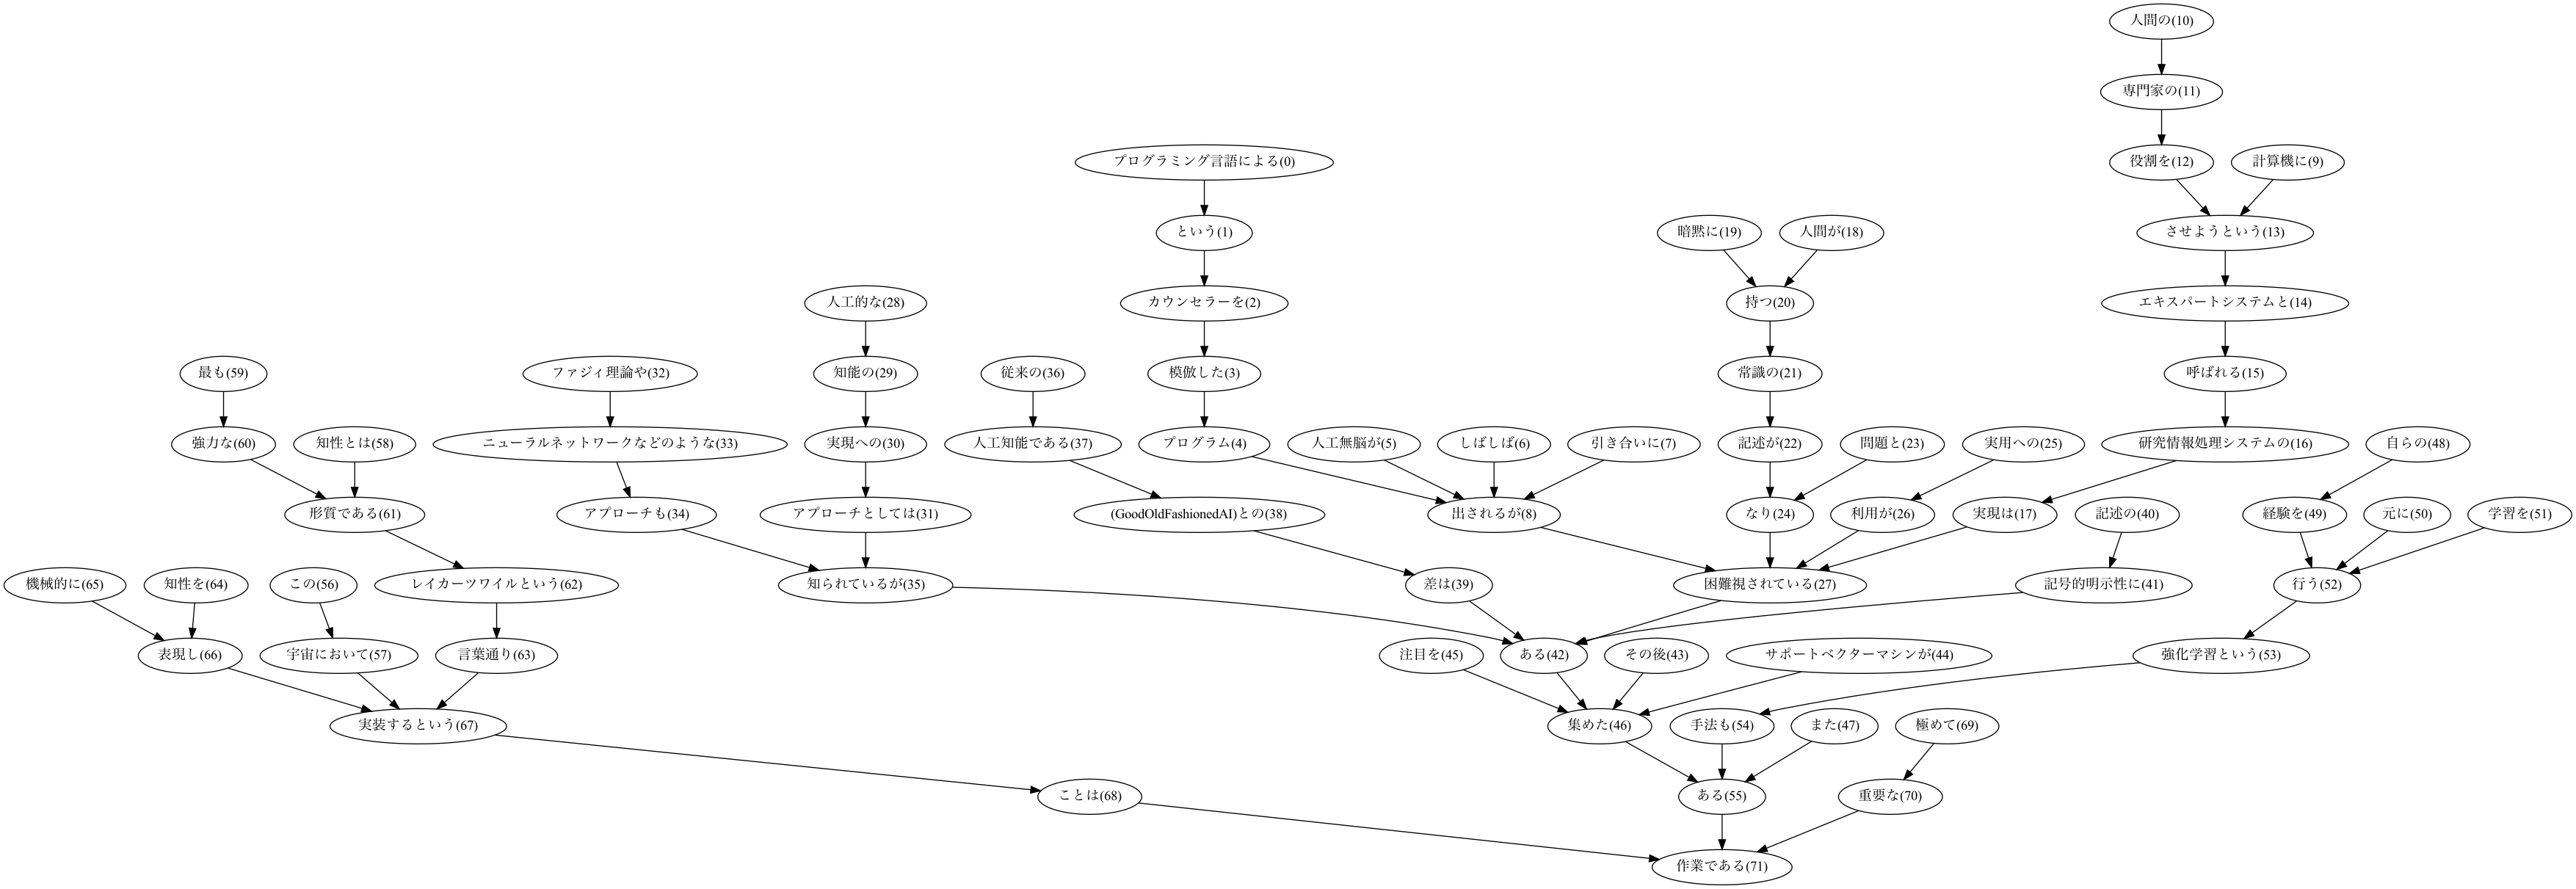

In [7]:
import pydot
from IPython.display import Image,display_png
from graphviz import Digraph

sentence = sentences[7]
edges = []
for id, chunk in enumerate(sentence.chunks):
    if int(chunk.dst) not in [None, -1]:
        modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
        modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int( chunk.dst)].morphs] + ['(' + str(chunk.dst) + ')'])
        edges.append([modifier, modifiee])
n = pydot.Node('node')
n.fontname = 'IPAGothic'
g = pydot.graph_from_edges(edges, directed=True)
g.add_node(n)
g.write_png('./ans44.png')
display_png(Image('./ans44.png'))

In [8]:
with open('./ans45.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos == '動詞':
                    cases = []
                    for src in chunk.srcs:
                        cases = cases + [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']
                    if len(cases) > 0:
                        cases = sorted(list(set(cases)))
                        line = '{}\t{}'.format(morph.base, ' '.join(cases))
                        print(line, file=f)
                    break

In [11]:
with open('./ans46.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos == '動詞':
                    cases = []
                    modi_chunks = []
                    for src in chunk.srcs:
                        case = [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']
                        if len(case) > 0:
                            cases = cases + case
                            modi_chunks.append(''.join(morph.surface for morph in sentence.chunks[src].morphs if morph.pos != '記号'))
                    if len(cases) > 0:
                        cases = sorted(list(set(cases)))
                        line = '{}\t{}\t{}'.format(morph.base, ' '.join(cases), ' '.join(modi_chunks))
                        print(line, file=f)
                    break